<a href="https://colab.research.google.com/github/AngTorresv/Machine_Learning/blob/main/Algoritmo_evolutivo/Algoritmo_evolutivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo evolutivo para hallar el punto maximo de una funcion 

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
# podemos introducir la funcion matematica que deceemos
def f(x):
     return   abs(x*math.sin(10*x**2)) #-(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2
    
# range [a,b] 

a= -2
b= 2

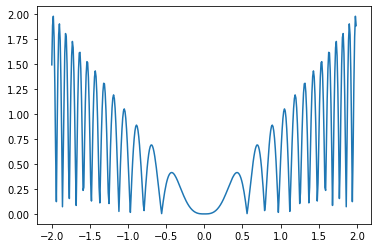

In [35]:
y_axis = []

x_axis = np.arange(a,b,0.01)
for num in x_axis:
    y_axis.append(f(num))

plt.plot(x_axis,y_axis)   
plt.show()

In [6]:

#Transformmos lista de nuemros en un numero decimal 
def lis_des(num):
    decimal=0
    for i in range(len(num)):
             decimal+=num[i]*10**(-i)
    return decimal

x = [0,3,4,5]

lis_des(x)

0.34500000000000003

In [7]:
# los individuos de nuestra poblacion seran numeros aleatorias en [a,b]
ind_size = 15

genetic = [[a,b-1],[0,1,2,3,4,5,6,7,8,9]]

individuo = []
individuo += [np.random.choice(genetic[0])]
individuo += list(np.random.choice(genetic[1], ind_size-1))
lis_des(individuo)

1.91314523901379

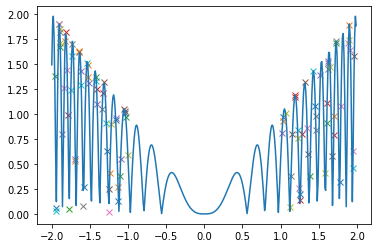

In [13]:
#creamos 100 individuos para nuestra poblacion
population = []
for i in range(100):   
    individuo = []
    individuo += [np.random.choice(genetic[0])]
    individuo += list(np.random.choice(genetic[1], ind_size-1))
    population.append(individuo)
#Los individuos se distribuyen aleatoriamente
for individuo in population:

    x = lis_des(individuo)
    y = f(x)

    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)        

In [16]:
# la funcion fitness sera la medida con la cual calificaremos a los mejores individuos de la poblacion
fitness = []

for individuo in population:
    x = lis_des(individuo)  
    y = f(x)   
    fitness += [y]
    
fitness = np.array(fitness)

fitness = fitness/fitness.sum()

In [36]:
# los individuos con mayor fitness tendran mayor probabilidad de reproducirsen
size_population = len(population)
offspring = []
for i in range(size_population//2):
    parents = np.random.choice(size_population, 2, p=fitness)
    cross_point = np.random.randint(ind_size)
    offspring += [population[parents[0]][:cross_point] + 
                  population[parents[1]][cross_point:]]
    offspring += [population[parents[1]][:cross_point] + 
                  population[parents[0]][cross_point:]]                

In [25]:
#en los individuos actuaran mutaciones aleatoreas simulando la evolucion natual
def mutate(individuals, p, gen):
    for i in range(len(individuals)):
        mutate_individual=individuals[i]
        if np.random.random() < p:
            mutation = np.random.choice(gen[0])
            mutate_individual = [mutation] + mutate_individual[1:]
        
        for j in range(1,len(mutate_individual)):
            if np.random.random() < p:
                mutation = np.random.choice(gen[1])
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:]
        individuals[i] = mutate_individual

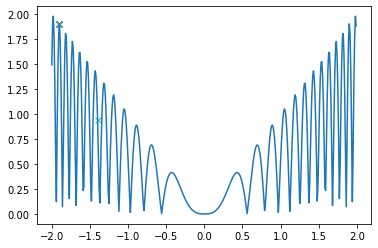

In [34]:
# juntamos todo en un bukle for para llevar a cabo el proceso evolutivo en multiples generaciones
generaciones = 500
for _ in range(generaciones):
    fitness =[]
    for individuo in population:
        x = lis_des(individuo)
        y = f(x)
        fitness += [y]
    fitness = np.array(fitness)
    fitness = fitness/fitness.sum()    
    offspring = []
    for i in range(size_population//2):
        parents = np.random.choice(size_population, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [population[parents[0]][:cross_point] + population[parents[1]][cross_point:]]
        offspring += [population[parents[1]][:cross_point] + population[parents[0]][cross_point:]]    
    population = offspring
    
 # la probabilidad de que un individuo sufra una mutacion es de 0.01% 
    
mutate(population,0.01,genetic)

for individuo in population:

    x = lis_des(individuo)
    y = f(x)

    plt.plot(x,y,'x')    
plt.plot(x_axis,y_axis) 
plt.show()     